In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import graphviz
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cd input/

C:\Users\jason\Desktop\大一課程\資料探勘\H24116049_DM_Project2\input


# Decision Tree Classifier

## Data without Noise

In [3]:
data = pd.read_csv("data.csv")
feature_name = list(data.columns)[:18]

train_data = data[:800]
test_data = data[800:]

train_x = train_data.drop("output", axis=1)
train_y = train_data.output

test_x = test_data.drop("output", axis=1)
test_y = test_data.output

In [4]:
#calculate the accuracy of testing data
def cal_test_acc(predicted, test_y):
    count = 0
    for i in range(len(predicted)):
        if predicted[i] == list(test_y)[i]:
            count += 1
    test_acc = count / len(predicted)

    return test_acc

In [5]:
#construct models by different max_depth
for i in range(1, 10):
    Model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    Model.fit(train_x, train_y)

    Acc = Model.score(train_x, train_y)
    Predicted = Model.predict(test_x)
    Test_acc = cal_test_acc(Predicted, test_y)
    print("max_depth = {}".format(i))
    print("Acc: {:.3f},     Test_Acc: {:.3f}".format(Acc, Test_acc))
    print("================================")

max_depth = 1
Acc: 0.765,     Test_Acc: 0.780
max_depth = 2
Acc: 0.875,     Test_Acc: 0.855
max_depth = 3
Acc: 0.875,     Test_Acc: 0.855
max_depth = 4
Acc: 0.935,     Test_Acc: 0.920
max_depth = 5
Acc: 0.940,     Test_Acc: 0.955
max_depth = 6
Acc: 1.000,     Test_Acc: 1.000
max_depth = 7
Acc: 1.000,     Test_Acc: 1.000
max_depth = 8
Acc: 1.000,     Test_Acc: 1.000
max_depth = 9
Acc: 1.000,     Test_Acc: 1.000


## Data with Noise

In [6]:
n_data = pd.read_csv("data_with_noise.csv")
feature = list(n_data.columns[:18])

n_train_data = n_data[:1000]
n_test_data = n_data[1000:]

n_train_X = n_train_data.drop("output", axis=1)
n_train_y = n_train_data["output"]

n_test_X = n_test_data.drop("output", axis=1)
n_test_y = n_test_data["output"]

In [7]:
for i in range(1, 10):
    Model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    Model.fit(n_train_X, n_train_y)

    Acc = Model.score(n_train_X, n_train_y)
    Predicted = Model.predict(n_test_X)
    Test_acc = cal_test_acc(Predicted, n_test_y)
    print("max_depth = {}".format(i))
    print("Acc: {:.3f},     Test_Acc: {:.3f}".format(Acc, Test_acc))
    print("================================")

max_depth = 1
Acc: 0.720,     Test_Acc: 0.780
max_depth = 2
Acc: 0.814,     Test_Acc: 0.855
max_depth = 3
Acc: 0.814,     Test_Acc: 0.855
max_depth = 4
Acc: 0.860,     Test_Acc: 0.920
max_depth = 5
Acc: 0.863,     Test_Acc: 0.915
max_depth = 6
Acc: 0.916,     Test_Acc: 0.985
max_depth = 7
Acc: 0.921,     Test_Acc: 0.980
max_depth = 8
Acc: 0.949,     Test_Acc: 0.925
max_depth = 9
Acc: 0.980,     Test_Acc: 0.905


# KNN

## Data without Noise

In [8]:
data = pd.read_csv("data.csv")

train_data = data[:800]
test_data = data[800:]

train_X = train_data.drop("output", axis=1)
train_y = train_data["output"]

test_X = test_data.drop("output", axis=1)
test_y = test_data["output"]

In [9]:
#construct model by different n_neighbors
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(train_X, train_y)
    Acc = model.score(train_X, train_y)
    
    Predicted = model.predict(test_X)
    Test_acc = cal_test_acc(Predicted, test_y)
    print("n_neighbors = {}".format(i))
    print("Acc: {:.3f},     Test_Acc: {:.3f}".format(Acc, Test_acc))
    print("================================")

n_neighbors = 1
Acc: 1.000,     Test_Acc: 0.830
n_neighbors = 2
Acc: 0.905,     Test_Acc: 0.820
n_neighbors = 3
Acc: 0.940,     Test_Acc: 0.835
n_neighbors = 4
Acc: 0.896,     Test_Acc: 0.860
n_neighbors = 5
Acc: 0.926,     Test_Acc: 0.900
n_neighbors = 6
Acc: 0.907,     Test_Acc: 0.865
n_neighbors = 7
Acc: 0.927,     Test_Acc: 0.895
n_neighbors = 8
Acc: 0.912,     Test_Acc: 0.870
n_neighbors = 9
Acc: 0.943,     Test_Acc: 0.905


In [10]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(train_X, train_y)
Acc = model.score(train_X, train_y)
predicted = model.predict(train_X)
    
Predicted = model.predict(test_X)
Test_acc = cal_test_acc(Predicted, test_y)

C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Predicted Label of Testing Data')

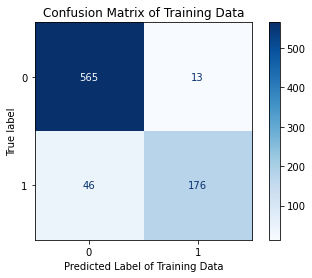

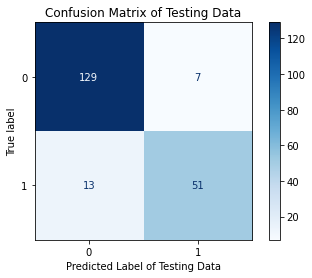

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, train_X, train_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Training Data")
plt.xlabel("Predicted Label of Training Data")

plot_confusion_matrix(model, test_X, test_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Testing Data")
plt.xlabel("Predicted Label of Testing Data")

## Data with Noise

In [12]:
data = pd.read_csv("data_with_noise.csv")

n_train_data = n_data[:1000]
n_test_data = n_data[1000:]

n_train_X = n_train_data.drop("output", axis=1)
n_train_y = n_train_data["output"]

n_test_X = n_test_data.drop("output", axis=1)
n_test_y = n_test_data["output"]

In [13]:
for i in range(1, 10):
    Model = KNeighborsClassifier(n_neighbors = i)
    Model.fit(n_train_X, n_train_y)
    Acc = Model.score(n_train_X, n_train_y)
    
    Predicted = Model.predict(n_test_X)
    Test_acc = cal_test_acc(Predicted, n_test_y)
    print("n_neighbors = {}".format(i))
    print("Acc: {:.3f},     Test_Acc: {:.3f}".format(Acc, Test_acc))
    print("================================")

n_neighbors = 1
Acc: 0.999,     Test_Acc: 0.775
n_neighbors = 2
Acc: 0.869,     Test_Acc: 0.775
n_neighbors = 3
Acc: 0.874,     Test_Acc: 0.800
n_neighbors = 4
Acc: 0.854,     Test_Acc: 0.835
n_neighbors = 5
Acc: 0.871,     Test_Acc: 0.870
n_neighbors = 6
Acc: 0.852,     Test_Acc: 0.875
n_neighbors = 7
Acc: 0.862,     Test_Acc: 0.890
n_neighbors = 8
Acc: 0.843,     Test_Acc: 0.885
n_neighbors = 9
Acc: 0.861,     Test_Acc: 0.895


In [14]:
Model = KNeighborsClassifier(n_neighbors = 5)
Model.fit(n_train_X, n_train_y)
Acc = Model.score(n_train_X, n_train_y)

C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Predicted Label of Testing Data')

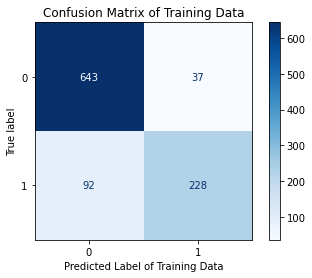

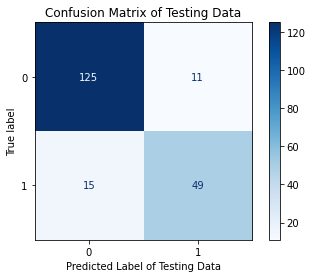

In [15]:
plot_confusion_matrix(Model, n_train_X, n_train_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Training Data")
plt.xlabel("Predicted Label of Training Data")

plot_confusion_matrix(Model, n_test_X, n_test_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Testing Data")
plt.xlabel("Predicted Label of Testing Data")

# Naive Bayes Classifier
## Data without Noise

In [16]:
data = pd.read_csv("data.csv")

train_data = data[:800]
test_data = data[800:]

train_X = train_data.drop("output", axis=1)
train_y = train_data["output"]

test_X = test_data.drop("output", axis=1)
test_y = test_data["output"]

In [17]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_X, train_y)
Acc = model.score(train_X, train_y)
Predicted = model.predict(test_X)

test_Acc = cal_test_acc(Predicted, test_y) 

print(Acc)
print(test_Acc)

0.765
0.78


C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix of Testing Data. Acc = 0.78')

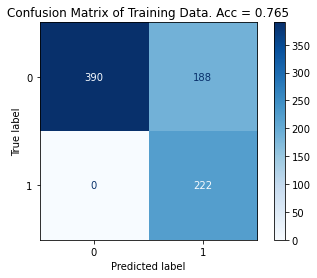

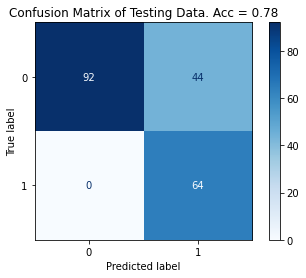

In [18]:
plot_confusion_matrix(model, train_X, train_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Training Data. Acc = 0.765")

plot_confusion_matrix(model, test_X, test_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Testing Data. Acc = 0.78")

In [19]:
#observe the FP data
import numpy as np
test = np.array(test_X)

for i in range(len(Predicted)):
    if Predicted[i] == 1 and list(test_y)[i] == 0:
        print("{}:  {}".format(i, test[i]))

0:  [0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1]
3:  [1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1]
9:  [0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1]
13:  [0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1]
15:  [1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1]
25:  [1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0]
34:  [1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0]
36:  [0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0]
40:  [1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1]
45:  [1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0]
46:  [1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1]
47:  [1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 1]
48:  [0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1]
51:  [1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
62:  [1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1]
64:  [0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1]
66:  [1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1]
69:  [1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1]
71:  [0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0]
84:  [0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
86:  [1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0]
88:  [1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1]
92:  [1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1]
93:  [1 1 0 0 

## Data with Noise

In [20]:
data = pd.read_csv("data_with_noise.csv")

n_train_data = n_data[:1000]
n_test_data = n_data[1000:]

n_train_X = n_train_data.drop("output", axis=1)
n_train_y = n_train_data["output"]

n_test_X = n_test_data.drop("output", axis=1)
n_test_y = n_test_data["output"]

In [21]:
Model = GaussianNB()
Model.fit(n_train_X, n_train_y)
Acc = Model.score(n_train_X, n_train_y)
Predicted = Model.predict(n_test_X)

test_Acc = cal_test_acc(Predicted, n_test_y)

print(Acc)
print(test_Acc)

0.883
0.96


C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jason\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix on Testing Data. Acc = 0.96')

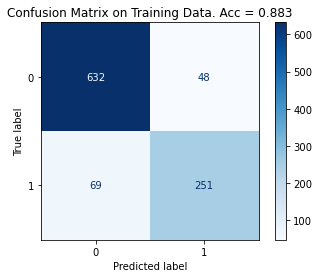

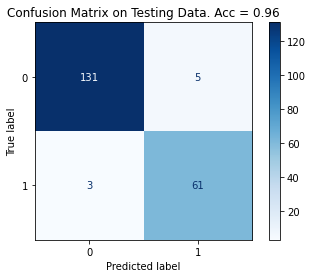

In [22]:
plot_confusion_matrix(Model, n_train_X, n_train_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Training Data. Acc = 0.883")

plot_confusion_matrix(Model, n_test_X, n_test_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix on Testing Data. Acc = 0.96")